# 花哨的索引
在前面的小节中，我们看到了如何利用简单的索引值（如 arr[0]）、切片（如 arr[:5]）和布尔掩码（如 arr[arr > 0]）获得并修改部分数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。
## 探索花哨的索引
花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。
例如以下数组：

In [2]:
import numpy as np
rand=np.random.RandomState(42)

x=rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


一种方法是通过传递索引的单个列表或数组来获得同样的结果：

In [3]:
ind=[3,7,4]
x[ind]

array([71, 86, 60])

利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致：

In [4]:
ind=np.array([[3,7],
             [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

花哨的索引也对多个维度适用。假设我们有以下数组：

In [5]:
X=np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row=np.array([0,1,2])
col=np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

## 组合索引

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [11]:
X[2,[2,0,1]]# 行号为2，列号2,0,1

array([10,  8,  9])

In [12]:
X[1:,[2,0,1]]# 索引与切片组合

array([[ 6,  4,  5],
       [10,  8,  9]])

更可以将花哨的索引和掩码组合使用：

In [14]:
row[:,np.newaxis]

array([[0],
       [1],
       [2]])

In [16]:
mask=np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [17]:
mask# 意思是选中0列和3列(0和3为True)

array([ True, False,  True, False])

In [18]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
row[:,np.newaxis].shape

(3, 1)

## 示例：选择随机点
花哨的索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有一个 N×D 的矩阵，表示在 D 个维度的 N 个点。以下是一个**二维正态分布**的点组成的数组：

In [20]:
mean=[0,0]
cov=[[1,2],
     [2,5]]
X=rand.multivariate_normal(mean,cov,100)# 均值，协方差矩阵
X.shape

(100, 2)

E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


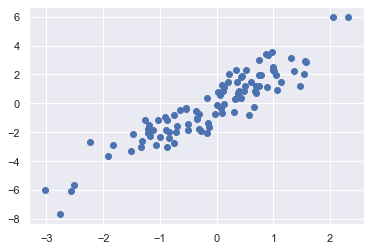

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置绘图风格

plt.scatter(X[:,0],X[:,1])

我们将利用花哨的索引随机选取 20 个点——选择 20 个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值：

In [27]:
indices=np.random.choice(X.shape[0],20,replace=False)# 从给定的一维数组中生成随机样本
# 如果是ndarray，则从它的元素生成一个随机样本。
# 如果是int型，则随机样本的生成方式类似于np.arange(a)
indices

array([62, 34, 14, 21, 28,  4, 51,  7, 55, 31, 22, 43, 12, 92, 78,  1, 56,
       70, 45, 79])

In [28]:
selection=X[indices]
selection.shape

(20, 2)

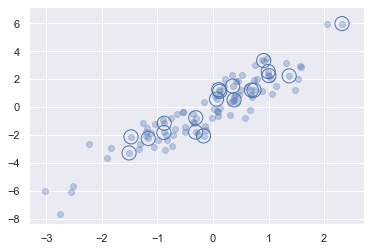

In [29]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', edgecolor='b', s=200)

这种方法通常用于快速分割数据，即需要分割训练 / 测试数据集以验证统计模型

## 用花哨的索引修改值
正如花哨的索引可以被用于获取部分数组，它也可以被用于修改部分数组。例如，假设我们有一个索引数组，并且希望设置数组中对应的值：

In [30]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


如果你希望累加，该怎么做呢？你可以借助通用函数中的 at() 方法（在 NumPy 1.8
以后的版本中可以使用）来实现。进行如下操作：

In [32]:
x=np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


at()函数在这里对给定的操作、给定的索引（这里是 i）以及给定的值（这里是 1）执行的是就地操作。

## 示例：数据区间划分
假定我们有 1000个值，希望快速统计分布在每个区间中的数据频次，可以用 ufunc.at 来计算：

In [35]:
np.random.seed(42)
x=np.random.randn(100)

# 手动计算直方图
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)

In [43]:
i=np.searchsorted(bins,x)
# 对x中的每一个元素，划分到bins的区间中
# 并返回每一个元素对应的区间
np.add.at(counts, i, 1)

当然，如果每次需要画直方图你都这么做的话，也是很不明智的。这就是为什么 Matplotlib提供了 plt.hist() 方法，该方法仅用一行代码就实现了上述功能：

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

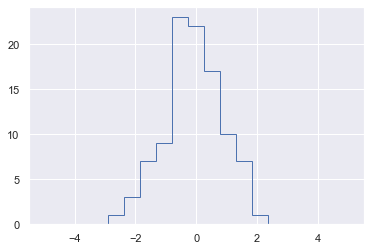

In [44]:
plt.hist(x, bins, histtype='step')